In [2]:
import numpy as np
import mtcnn
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [13]:
def detect_faces(image_path):
    # lets create a MTCNN class so we can detect faces
    face_detector = mtcnn.MTCNN()
    image = Image.open(image_path)
    # convert image to RGB
    image = image.convert("RGB")
    # detect faces
    faces = face_detector.detect_faces(np.array(image))
    return image, faces

def draw_faces(image, faces):
    # we can use opencv or PIL to draw the face bounding boxes
    draw = ImageDraw.Draw(image)
    
    for face in faces:
        box = face['box']
        conf_text = face['confidence']
        keypoints = face['keypoints']
        # box output are x, y, height and width
        draw.rectangle([(box[0], box[1]), (box[0]+box[2], box[1]+box[3])], outline ="green")
        # we need to draw for each keypoint
        for keypoint in keypoints.values():
            draw.ellipse((keypoint[0]-2, keypoint[1]-2, keypoint[0]+2, keypoint[1]+2), fill ='red')
    
    plt.figure(figsize=(20,40))
    plt.imshow(image)

9/9 [==============================] - 0s 17ms/step


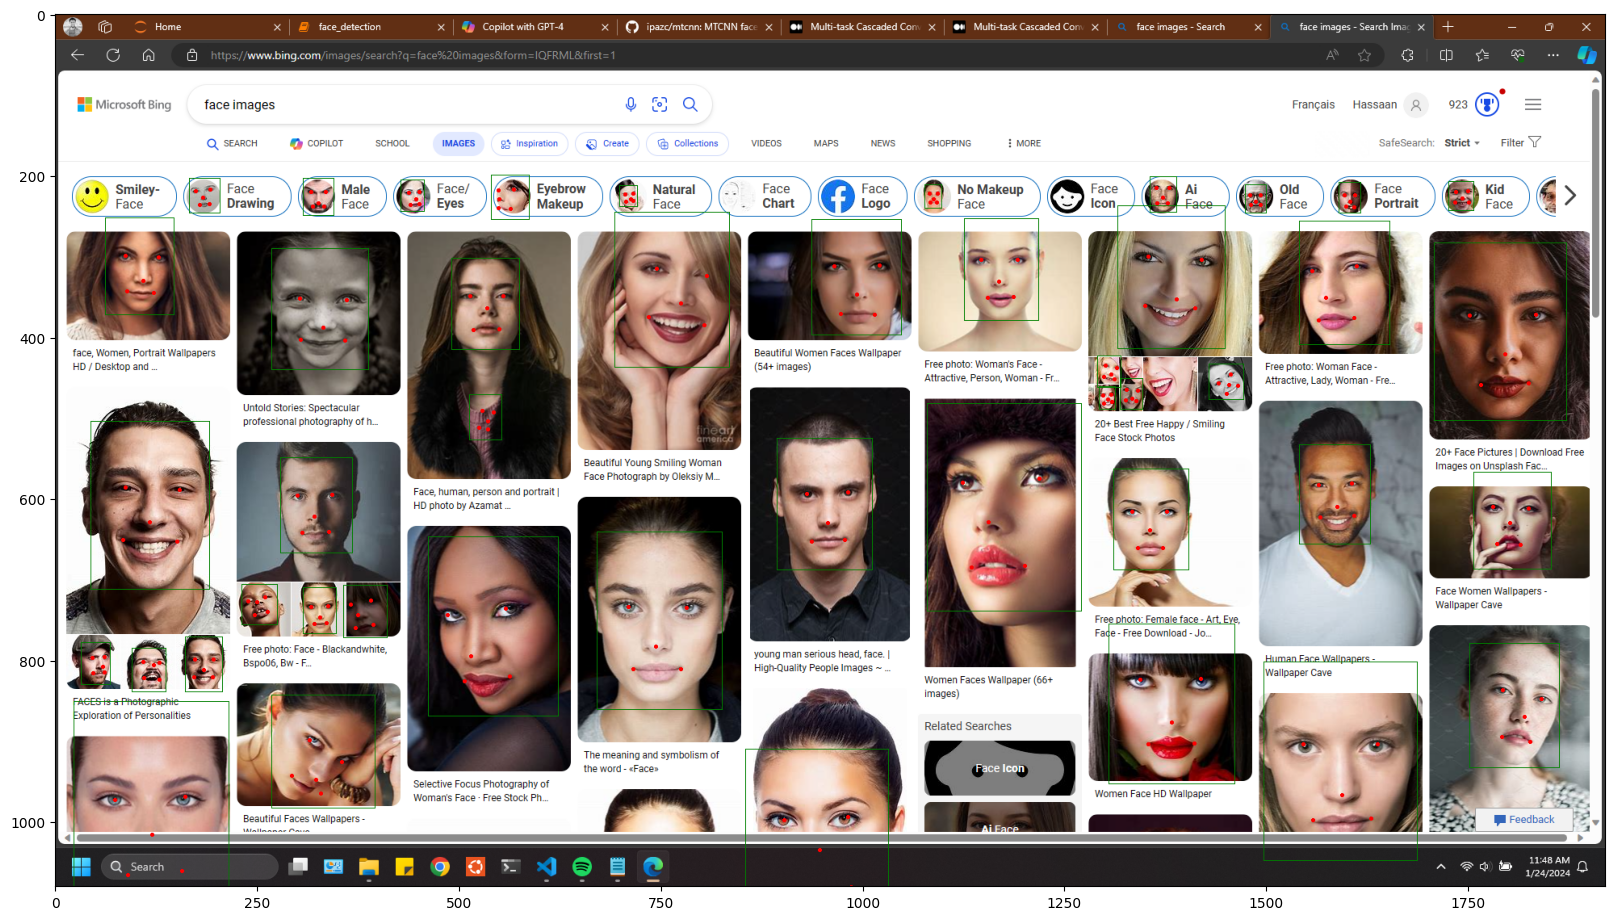

In [14]:
image, faces = detect_faces(image_path='./face_detection_test.png') 
draw_faces(image, faces)